In [132]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import ternary
import warnings
import random

%matplotlib inline
warnings.filterwarnings('ignore')

# Conclusions from this notebook

***Note: all growth rates are net growth rates. No herbivores are included. The starting values for each run were C0 = 0.99, M0 = T0 = 0.005.***

For coral to exist at equilibrium, alpha3 (macro overgrowth of coral relative to free space) must = 0.0 (or be very near to it, TBD), across all values of r, gamma, beta, alpha1, and alpha2. Thus, a system without fish can only exist when macroalgae cannot overgrow coral, or overgrows very, very slow (TBD - look at next notebook).

# Fung et al., 2011 parameter ranges

**Coral Growth:** $r =  0.04–0.2 yr^{-1}$  *(Fung et al., 2011)*

**Growth Rate of Macroalgae onto Free Space:** $gamma = 0.05–0.4 yr^{-1}$ *(Fung et al., 2011)*

**Growth Rate of Turf onto Free Space** $beta = 2–20 yr^{-1}$ *(Fung et al., 2011)*

**Growth rate of corals onto turf relative to the rate onto free space:** $alpha1 = 0.0-1.0$ *(Fung et al., 2011)*

**Growth rate of macroalgae onto turf relative to the rate onto free space** $alpha2 = 0–0.9$ *(Fung et al., 2011)* 

**Rate of macroalgae overgrowth onto coral relative to the rate onto free space** $alpha3 = 0–0.9$ *(Fung et al., 2011)*

In [133]:
def dNdt(t, N, r, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt

    return dC, dM, dT

In [134]:
dt = 1
NUMSTEPS = 10000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
gamma = (0.05 + 0.4)/2 #macro algae growth rate over free space
beta = (2 + 20)/2 #turf growth rate onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

In [135]:
r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,4)

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,4)

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,4)

alpha1_value = np.linspace(0, 1.0, 15)
alpha1_value = np.round(alpha1_value,4)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,4)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,4)

## Defining parcross functions (for each, change function title and placement of p1/p2)

In [136]:
# r x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

# r x gamma
def parcross_r_gamma(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (p1, 
                                        p2, 
                                        beta, 
                                        alpha1, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# r x beta
def parcross_r_beta(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (p1, 
                                        gamma, 
                                        p2, 
                                        alpha1, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# r x alpha1
def parcross_r_a1(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (p1, 
                                        gamma, 
                                        beta, 
                                        p2, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# r x alpha2
def parcross_r_a2(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (p1, 
                                        gamma, 
                                        beta, 
                                        alpha1, 
                                        p2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# r x alpha3
def parcross_r_a3(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (p1, 
                                        gamma, 
                                        beta, 
                                        alpha1, 
                                        alpha2, 
                                        p2), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# gamma x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

# gamma x beta
def parcross_gamma_beta(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        p1, 
                                        p2, 
                                        alpha1, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# gamma x alpha1
def parcross_gamma_a1(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        p1, 
                                        beta, 
                                        p2, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# gamma x alpha2
def parcross_gamma_a2(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        p1, 
                                        beta, 
                                        alpha1, 
                                        p2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# gamma x alpha3
def parcross_gamma_a3(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        p1, 
                                        beta, 
                                        alpha1, 
                                        alpha2, 
                                        p2), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# beta x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

# beta x alpha1
def parcross_beta_a1(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        p1, 
                                        p2, 
                                        alpha2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# beta x alpha2
def parcross_beta_a2(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        p1, 
                                        alpha1, 
                                        p2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# beta x alpha3
def parcross_beta_a3(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        p1, 
                                        alpha1, 
                                        alpha2, 
                                        p2), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# alpha1 x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

# alpha1 x alpha2
def parcross_a1_a2(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        beta, 
                                        p1, 
                                        p2, 
                                        alpha3), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# alpha1 x alpha3
def parcross_a1_a3(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        beta, 
                                        p1, 
                                        alpha2, 
                                        p2), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

# alpha2 x alpha3 ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

def parcross_a2_a3(p1_val, p2_val, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3):

    outputs = []
    outputs_prime = []

    for p1 in p1_val:

        for p2 in p2_val:

            if (C0 + M0 + T0 <= 1):

                sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', 
                                args = (r, 
                                        gamma, 
                                        beta, 
                                        alpha1, 
                                        p1, 
                                        p2), 
                                dense_output=True)
                N = sol.sol(time_points) 

                C_array = N[0,:]
                M_array = N[1,:]
                T_array = N[2,:]

                outputs.append((C_array, M_array, T_array))
                outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))
           
    df = pd.DataFrame(outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])
    return(df)

## Heatmaps (for each, change function title, value string, & plot labels/title)

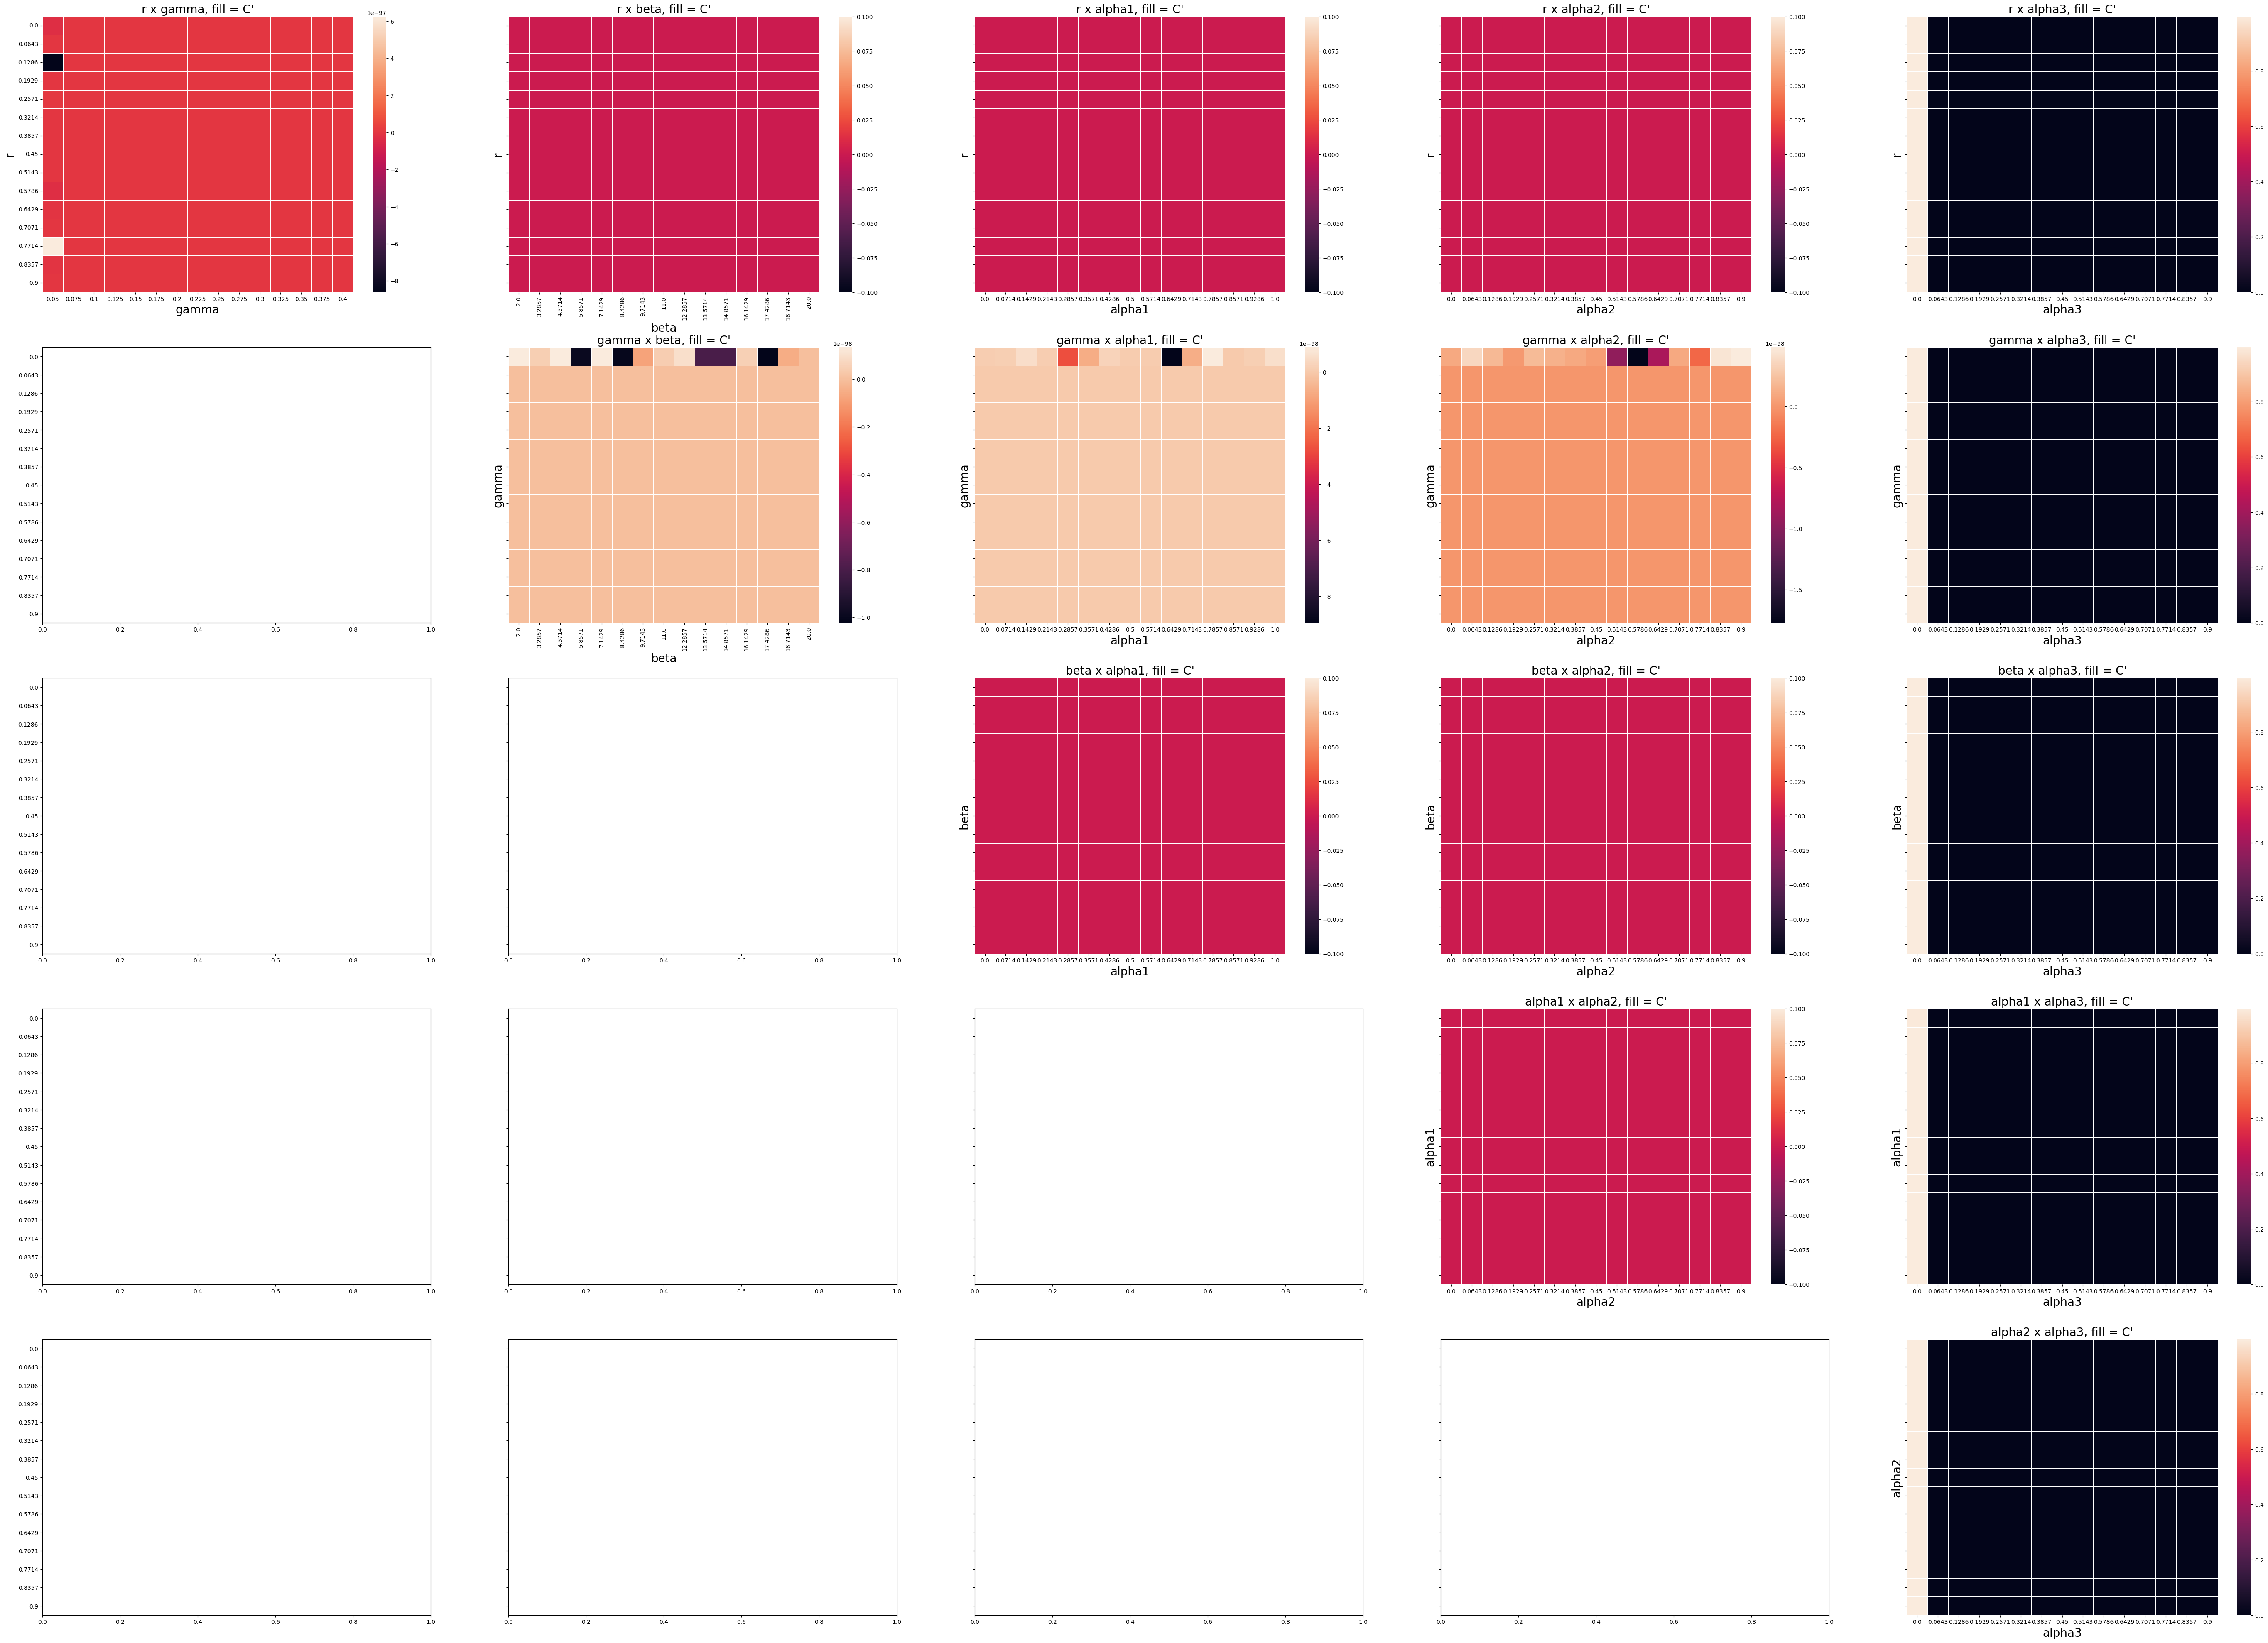

In [137]:
figure, ax = plt.subplots(ncols=5, nrows = 5, sharey=True, figsize=(70, 50))

# r x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

df = parcross_r_gamma(r_value, gamma_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_xlabel('gamma', fontsize = 20)
ax[0,0].set_ylabel('r', fontsize = 20)
ax[0,0].set_title("r x gamma, fill = C'", fontsize = 20);

df = parcross_r_beta(r_value, beta_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_xlabel('beta', fontsize = 20)
ax[0,1].set_ylabel('r', fontsize = 20)
ax[0,1].set_title("r x beta, fill = C'", fontsize = 20);

df = parcross_r_a1(r_value, alpha1_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[0,2])
ax[0,2].set_xlabel('alpha1', fontsize = 20)
ax[0,2].set_ylabel('r', fontsize = 20)
ax[0,2].set_title("r x alpha1, fill = C'", fontsize = 20);

df = parcross_r_a2(r_value, alpha2_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[0,3])
ax[0,3].set_xlabel('alpha2', fontsize = 20)
ax[0,3].set_ylabel('r', fontsize = 20)
ax[0,3].set_title("r x alpha2, fill = C'", fontsize = 20);

df = parcross_r_a3(r_value, alpha3_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[0,4])
ax[0,4].set_xlabel('alpha3', fontsize = 20)
ax[0,4].set_ylabel('r', fontsize = 20)
ax[0,4].set_title("r x alpha3, fill = C'", fontsize = 20);

# gamma x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

df = parcross_gamma_beta(gamma_value, beta_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_xlabel('beta', fontsize = 20)
ax[1,1].set_ylabel('gamma', fontsize = 20)
ax[1,1].set_title("gamma x beta, fill = C'", fontsize = 20);

df = parcross_gamma_a1(gamma_value, alpha1_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[1,2])
ax[1,2].set_xlabel('alpha1', fontsize = 20)
ax[1,2].set_ylabel('gamma', fontsize = 20)
ax[1,2].set_title("gamma x alpha1, fill = C'", fontsize = 20);

df = parcross_gamma_a2(gamma_value, alpha2_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[1,3])
ax[1,3].set_xlabel('alpha2', fontsize = 20)
ax[1,3].set_ylabel('gamma', fontsize = 20)
ax[1,3].set_title("gamma x alpha2, fill = C'", fontsize = 20);

df = parcross_gamma_a3(gamma_value, alpha3_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[1,4])
ax[1,4].set_xlabel('alpha3', fontsize = 20)
ax[1,4].set_ylabel('gamma', fontsize = 20)
ax[1,4].set_title("gamma x alpha3, fill = C'", fontsize = 20);

# beta x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

df = parcross_beta_a1(beta_value, alpha1_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[2,2])
ax[2,2].set_xlabel('alpha1', fontsize = 20)
ax[2,2].set_ylabel('beta', fontsize = 20)
ax[2,2].set_title("beta x alpha1, fill = C'", fontsize = 20);

df = parcross_beta_a2(beta_value, alpha2_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[2,3])
ax[2,3].set_xlabel('alpha2', fontsize = 20)
ax[2,3].set_ylabel('beta', fontsize = 20)
ax[2,3].set_title("beta x alpha2, fill = C'", fontsize = 20);

df = parcross_beta_a3(beta_value, alpha3_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[2,4])
ax[2,4].set_xlabel('alpha3', fontsize = 20)
ax[2,4].set_ylabel('beta', fontsize = 20)
ax[2,4].set_title("beta x alpha3, fill = C'", fontsize = 20);

# alpha1 x all ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

df = parcross_a1_a2(alpha1_value, alpha2_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[3,3])
ax[3,3].set_xlabel('alpha2', fontsize = 20)
ax[3,3].set_ylabel('alpha1', fontsize = 20)
ax[3,3].set_title("alpha1 x alpha2, fill = C'", fontsize = 20);

df = parcross_a1_a3(alpha1_value, alpha3_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[3,4])
ax[3,4].set_xlabel('alpha3', fontsize = 20)
ax[3,4].set_ylabel('alpha1', fontsize = 20)
ax[3,4].set_title("alpha1 x alpha3, fill = C'", fontsize = 20);

# alpha2 x alpha3 ---------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

df = parcross_a2_a3(alpha2_value, alpha3_value, time_points, NUMYEARS, C0, M0, T0, r, gamma, beta, alpha1, alpha2, alpha3)
heatmap = (df.pivot(index = "p1", columns = "p2", values = "C_prime"))
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax[4,4])
ax[4,4].set_xlabel('alpha3', fontsize = 20)
ax[4,4].set_ylabel('alpha2', fontsize = 20)
ax[4,4].set_title("alpha2 x alpha3, fill = C'", fontsize = 20);

figure.savefig('parameter cross-analyses') 

## Code for finding ranges of parameters where coral can exist 
(kept just in case it becomes useful)

In [139]:
#df_r_alpha3 = pd.DataFrame(r_alpha3_outputs_prime, columns=['r','alpha3','C_prime','M_prime','T_prime'])
#threshold_r_alpha3 = df_r_alpha3[df_r_alpha3['C_prime'] > 0.01]

#df_gamma_alpha3 = pd.DataFrame(gamma_alpha3_outputs_prime, columns=['gamma','alpha3','C_prime','M_prime','T_prime'])
#threshold_gamma_alpha3 = df_gamma_alpha3[df_gamma_alpha3['C_prime'] > 0.01]

#df_beta_alpha3 = pd.DataFrame(beta_alpha3_outputs_prime, columns=['beta','alpha3','C_prime','M_prime','T_prime'])
#threshold_beta_alpha3 = df_beta_alpha3[df_beta_alpha3['C_prime'] > 0.01]

#df_alpha1_alpha3 = pd.DataFrame(alpha1_alpha3_outputs_prime, columns=['alpha1','alpha3','C_prime','M_prime','T_prime'])
#threshold_alpha1_alpha3 = df_alpha1_alpha3[df_alpha1_alpha3['C_prime'] > 0.01]

#df_alpha3_alpha2 = pd.DataFrame(alpha3_alpha2_outputs_prime, columns=['alpha3','alpha2','C_prime','M_prime','T_prime'])
#threshold_alpha3_alpha2 = df_alpha3_alpha2[df_alpha3_alpha2['C_prime'] > 0.01]

In [140]:
#threshold_r_alpha3['alpha3'].max()

#threshold_beta_alpha3['alpha3'].max()

#threshold_alpha1_alpha3['alpha3'].max()

#threshold_alpha3_alpha2['alpha3'].max()

#threshold_gamma_alpha3['alpha3'].max()
#threshold_gamma_alpha3[threshold_gamma_alpha3['alpha3'] > 0]